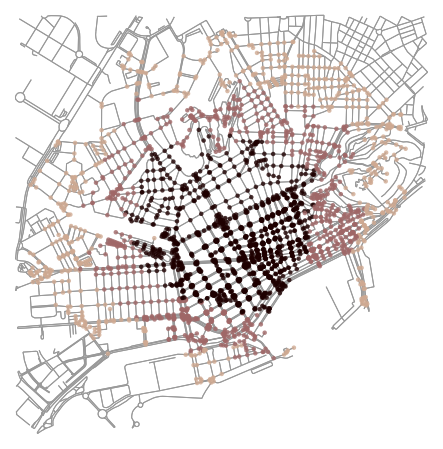

In [4]:
import osmnx as ox
import networkx as nx

point = (38.3459813, -0.49069405)
dist = 1500
networkType = 'walk'

G = ox.graph_from_point(point, distance=dist, network_type=networkType)

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] 

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink_r', start=0.5, return_hex=True)
node_colors = {}

radius_value = trip_times

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')      
    for node in subgraph.nodes():
        node_colors[node] = color 
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)